In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('train/train.csv')

In [4]:
df.shape

(404290, 6)

In [5]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
136782,136782,218158,218159,How can I get Job in Australia as metallurgist...,Is rbi assistant experience relevant for cfa?,0
33768,33768,61978,27545,What is the best way of improving english voca...,What is the best way to learn vocabulary?,1
160607,160607,250430,250431,"Why is Islam, as a major religion, being discr...",Why is Islam perpetually said to be in danger?...,0
152751,152751,10043,36474,Does green tea really help in losing weight?,How is Lipton Green Tea related to weight loss?,1
58685,58685,102909,55372,What is the funniest movie you've ever seen?,What's the funniest movie you have ever seen?,1
188910,188910,287557,287558,In the event of a cataclysm wha is the minimum...,What is the minimum number of people required ...,0
361368,361368,121493,190827,Which is the best country to live in the world?,What are some of the best countries to visit a...,1
114434,114434,186796,186797,Are you excited to go to work every day? What ...,How can I make Monday the most exciting day to...,0
166468,166468,37775,221002,"What are the big, mega dance clubs in Greece?","What are the big, mega dance clubs in Singapore?",0
255548,255548,370464,157142,How do I deduce a number's square root without...,What is the method to calculate a square root ...,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [7]:
# null values in columns
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [8]:
# duplicate rows
df.duplicated().sum()

0

0    255027
1    149263
Name: is_duplicate, dtype: int64
0    63.080215
1    36.919785
Name: is_duplicate, dtype: float64


<AxesSubplot: xlabel='is_duplicate', ylabel='count'>

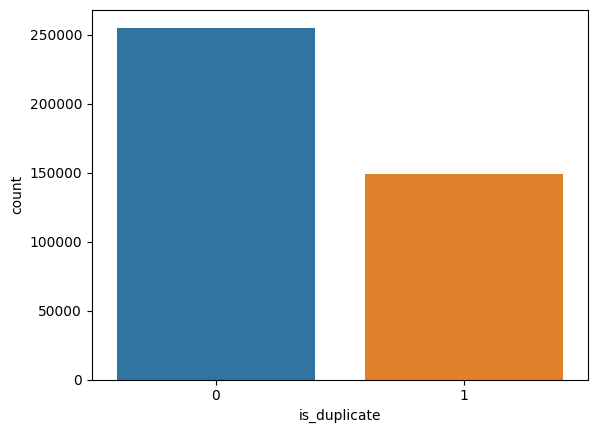

In [11]:
# Distribution of duplicate and non-duplicate questions

print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count()) * 100)

sns.countplot(x=df['is_duplicate'])

In [14]:
# Repeated questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions', np.unique(qid).shape[0])

repeat = qid.value_counts() > 1
print('Number of questions getting repeated', repeat[repeat].shape[0])

Number of unique questions 537933
Number of questions getting repeated 111780


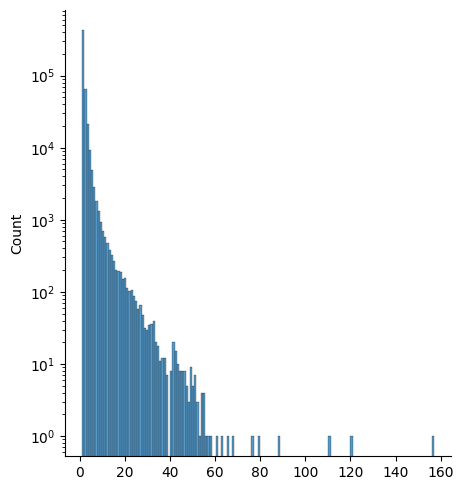

In [18]:
# Repeated questions histogram

sns.displot(qid.value_counts().values, bins=160)
plt.yscale('log')
plt.show()